#### Mohammad Zubair Hussain

# Titanic Dataset Model Development Using PyCaret

In this notebook, we went through a series of steps to preprocess the Titanic dataset and build a machine learning classification model using PyCaret. Below is an overview of the process we followed.

In [1]:
!pip install --user pycaret

!pip install shap

!pip install pycaret[analysis]


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached shap-0.44.1.tar.gz (1.1 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached interpret-0.6.7-py3-none-any.whl.metadata (1.0 kB)
  Using cached umap_learn-0.5.7-py3-none-any.whl.metadata (21 kB)
  Using cached ydata_profiling-4.12.0-py2.py3-none-any.whl.metadata (20 kB)
  Using cached explainerdashboard-0.4.7-py3-none-any.whl.metadata (3.8 kB)
  Using cached fairlearn-0.7.0-py3-none-any.whl.metadata (7.3 kB)
  Using cached dash_auth-2.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached dash_bootstrap_components-1.6.0-py3-none-a

  error: subprocess-exited-with-error
  
  × Building wheel for shap (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [178 lines of output]
      Attempting to build SHAP: with_binary=True, with_cuda=True (Attempt 1)
      NVCC ==>  C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.6\bin\nvcc.exe
      Compiling cuda extension, calling nvcc with arguments:
      ['C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v12.6\\bin\\nvcc.exe', '-allow-unsupported-compiler', 'shap/cext/_cext_gpu.cu', '-lib', '-o', 'build/_cext_gpu.lib', '-Xcompiler', '/MD', '--include-path', 'C:\\Program', 'Files\\Python312\\Include', '--std', 'c++14', '--expt-extended-lambda', '--expt-relaxed-constexpr', '-arch=sm_37', '-gencode=arch=compute_37,code=sm_37', '-gencode=arch=compute_70,code=sm_70', '-gencode=arch=compute_75,code=sm_75', '-gencode=arch=compute_75,code=compute_75']
      nvcc fatal   : Value 'sm_37' is not defined for option 'gpu-architecture'
      Exception occurred dur

In [2]:
# Import necessary libraries
import pandas as pd
from pycaret.classification import *
from sklearn.preprocessing import StandardScaler 
import pycaret
print(pycaret.__version__)



3.3.2


## 1. **Data Loading**


We began by loading the preprocessed training and test datasets (`processed_train.csv` and `processed_test.csv`) using Pandas. We verified that there were no missing values in the dataset.


In [3]:


# Load the preprocessed data
train_data = pd.read_csv('../Titanic/data/titanic/processed_train.csv')
test_data = pd.read_csv('../Titanic/data/titanic/processed_test.csv')

# Check the structure of the data
print(train_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked  Title  FamilySize  FarePerClass  \
0         A/5 21171   7.2500         0    0.0           2      2.416667   
1          PC 17599  71.2833         1    2.0           2     71.283300   
2  STON/O2. 3101282   7.9250         0    1.0           1      2.641667

In [4]:
print(train_data.dtypes)


PassengerId            int64
Survived               int64
Pclass                 int64
Name                  object
Sex                    int64
Age                  float64
SibSp                  int64
Parch                  int64
Ticket                object
Fare                 float64
Embarked               int64
Title                float64
FamilySize             int64
FarePerClass         float64
AgeGroup              object
FareRange             object
FarePerClassRange     object
dtype: object


## 2. Setting Up PyCaret

Next, we initialized the PyCaret classification pipeline using the `setup()` function. The target variable was set to `Survived`, and we excluded irrelevant features like `PassengerId`, `Name`, and `Ticket`. Additionally, we normalized and transformed the features to prepare the data for modeling.

In [5]:
# Set up PyCaret for classification
clf_setup = setup(data=train_data, target='Survived', session_id=42, 
                  ignore_features=['PassengerId', 'Name', 'Ticket'], 
                  normalize=True, transformation=True)

# This will allow PyCaret to automatically handle the categorical columns (Sex, Embarked, Title)



,Description,Value
0,Session id,42
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 17)"
4,Transformed data shape,"(891, 24)"
5,Transformed train set shape,"(623, 24)"
6,Transformed test set shape,"(268, 24)"
7,Ignore features,3
8,Numeric features,10
9,Categorical features,3


In [6]:
print(train_data.isnull().sum())


PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Embarked             0
Title                0
FamilySize           0
FarePerClass         0
AgeGroup             0
FareRange            0
FarePerClassRange    0
dtype: int64


## 3. Model Comparison

To determine the best model, we used the `compare_models()` function, which evaluates a range of machine learning algorithms. **The Gradient Boosting Classifier (GBC)** emerged as the best-performing model with an accuracy of approximately 83.1%.

In [7]:
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8379,0.8606,0.7453,0.8213,0.7778,0.6512,0.6565,0.1270
gbc,Gradient Boosting Classifier,0.8234,0.8741,0.7201,0.8069,0.7565,0.6193,0.6257,0.0750
rf,Random Forest Classifier,0.8075,0.8569,0.7163,0.7724,0.7384,0.5872,0.5929,0.0970
lda,Linear Discriminant Analysis,0.8058,0.8659,0.7243,0.7623,0.7396,0.5856,0.5891,0.0400
ridge,Ridge Classifier,0.8026,0.8656,0.7201,0.7560,0.7350,0.5784,0.5813,0.0380
lr,Logistic Regression,0.8010,0.8634,0.7284,0.7494,0.7357,0.5769,0.5799,0.5460
ada,Ada Boost Classifier,0.8009,0.8413,0.7205,0.7548,0.7331,0.5754,0.5800,0.0620
et,Extra Trees Classifier,0.7916,0.8252,0.7205,0.7361,0.7256,0.5580,0.5608,0.0900
knn,K Neighbors Classifier,0.7882,0.8138,0.7286,0.7287,0.7257,0.5538,0.5569,0.0540
dt,Decision Tree Classifier,0.7881,0.7691,0.7158,0.7340,0.7211,0.5510,0.5546,0.0380


In [8]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


## 4. Hyperparameter Tuning
After identifying GBC as the best model, we used the `tune_model()` function to optimize its hyperparameters. This resulted in slight improvements in various metrics such as accuracy, AUC, and F1 score.

In [9]:
# Tune the best model to find the best hyperparameters
tuned_model = tune_model(best_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.8825,0.7917,0.7600,0.7755,0.6328,0.6331
1,0.8095,0.8942,0.7083,0.7727,0.7391,0.5896,0.5910
2,0.8413,0.8803,0.6667,0.8889,0.7619,0.6465,0.6615
3,0.8710,0.9376,0.8696,0.8000,0.8333,0.7284,0.7301
4,0.8387,0.8542,0.5833,1.0000,0.7368,0.6318,0.6796
5,0.8871,0.9063,0.8333,0.8696,0.8511,0.7602,0.7607
6,0.8226,0.8728,0.7083,0.8095,0.7556,0.6173,0.6207
7,0.8065,0.7928,0.6667,0.8000,0.7273,0.5792,0.5850
8,0.8387,0.8827,0.7917,0.7917,0.7917,0.6601,0.6601


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## 5. Model Evaluation

We evaluated the tuned model using `evaluate_model()`, which produced a set of visualizations to assess the model's performance. These included plots such as the confusion matrix, ROC curve, and others.

In [10]:
# Evaluate the model
evaluate_model(tuned_model)



interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Selected Features: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title',
       'FamilySize', 'FarePerClass', 'AgeGroup', 'FareRange',
       'FarePerClassRange'],
      dtype='object')


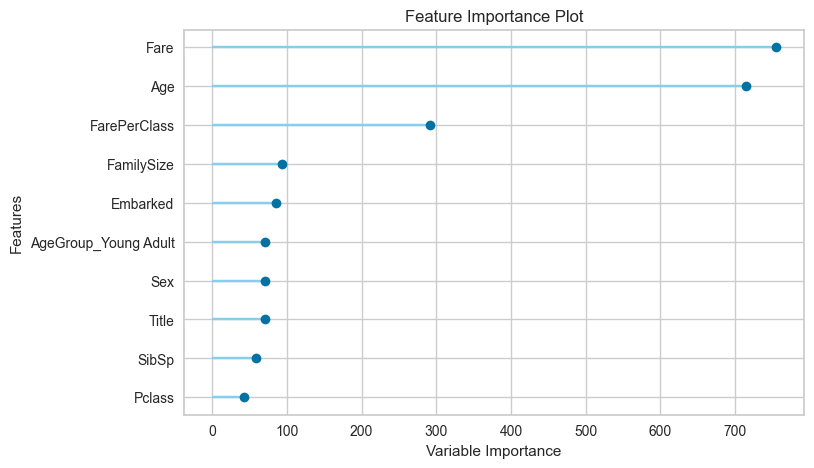

In [11]:
# Analyze feature selection
print("Selected Features:", clf_setup.X_train.columns)
plot_model(tuned_model, plot='feature')

In [12]:
# Try different models (example)
lr_model = create_model('lr')
rf_model = create_model('rf')
# Train the Gradient Boosting Classifier
gbc = create_model('gbc')

# Train the LightGBM Classifier
lightgbm = create_model('lightgbm')


# Evaluate metrics
print(pull())

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7619,0.8761,0.7917,0.6552,0.7170,0.5146,0.5215
1,0.7778,0.8868,0.6667,0.7273,0.6957,0.5212,0.5224
2,0.8254,0.9172,0.7917,0.7600,0.7755,0.6328,0.6331
3,0.8226,0.9064,0.8261,0.7308,0.7755,0.6298,0.6330
4,0.7903,0.7675,0.6250,0.7895,0.6977,0.5405,0.5491
5,0.8548,0.9419,0.8333,0.8000,0.8163,0.6964,0.6968
6,0.7581,0.8311,0.5833,0.7368,0.6512,0.4698,0.4773
7,0.8065,0.8015,0.7083,0.7727,0.7391,0.5857,0.5871
8,0.7903,0.8805,0.7083,0.7391,0.7234,0.5547,0.5550


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7937,0.8542,0.7500,0.7200,0.7347,0.5660,0.5663
1,0.7619,0.8419,0.5833,0.7368,0.6512,0.4741,0.4816
2,0.8095,0.8590,0.6667,0.8000,0.7273,0.5828,0.5885
3,0.8548,0.9303,0.9130,0.7500,0.8235,0.7022,0.7121
4,0.8226,0.8427,0.6250,0.8824,0.7317,0.6049,0.6249
5,0.8871,0.9178,0.8333,0.8696,0.8511,0.7602,0.7607
6,0.7903,0.8629,0.6667,0.7619,0.7111,0.5477,0.5507
7,0.7903,0.7917,0.6250,0.7895,0.6977,0.5405,0.5491
8,0.8226,0.8350,0.7917,0.7600,0.7755,0.6289,0.6293


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.9156,0.7917,0.7600,0.7755,0.6328,0.6331
1,0.8254,0.9006,0.6667,0.8421,0.7442,0.6144,0.6240
2,0.8254,0.8803,0.7083,0.8095,0.7556,0.6207,0.6240
3,0.8387,0.9091,0.8261,0.7600,0.7917,0.6605,0.6620
4,0.8226,0.8481,0.5833,0.9333,0.7179,0.5984,0.6335
5,0.8871,0.8898,0.7917,0.9048,0.8444,0.7565,0.7606
6,0.7903,0.8827,0.7083,0.7391,0.7234,0.5547,0.5550
7,0.7903,0.7895,0.6250,0.7895,0.6977,0.5405,0.5491
8,0.8387,0.8706,0.7917,0.7917,0.7917,0.6601,0.6601


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8413,0.8686,0.7917,0.7917,0.7917,0.6635,0.6635
1,0.8095,0.8729,0.6250,0.8333,0.7143,0.5758,0.5892
2,0.8254,0.8413,0.7083,0.8095,0.7556,0.6207,0.6240
3,0.8710,0.9142,0.8696,0.8000,0.8333,0.7284,0.7301
4,0.8548,0.8640,0.6667,0.9412,0.7805,0.6767,0.6992
5,0.8871,0.9002,0.8333,0.8696,0.8511,0.7602,0.7607
6,0.8065,0.8575,0.7083,0.7727,0.7391,0.5857,0.5871
7,0.8226,0.7752,0.6667,0.8421,0.7442,0.6112,0.6209
8,0.8710,0.8750,0.8333,0.8333,0.8333,0.7281,0.7281


      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8413  0.8686  0.7917  0.7917  0.7917  0.6635  0.6635
1       0.8095  0.8729  0.6250  0.8333  0.7143  0.5758  0.5892
2       0.8254  0.8413  0.7083  0.8095  0.7556  0.6207  0.6240
3       0.8710  0.9142  0.8696  0.8000  0.8333  0.7284  0.7301
4       0.8548  0.8640  0.6667  0.9412  0.7805  0.6767  0.6992
5       0.8871  0.9002  0.8333  0.8696  0.8511  0.7602  0.7607
6       0.8065  0.8575  0.7083  0.7727  0.7391  0.5857  0.5871
7       0.8226  0.7752  0.6667  0.8421  0.7442  0.6112  0.6209
8       0.8710  0.8750  0.8333  0.8333  0.8333  0.7281  0.7281
9       0.7903  0.8366  0.7500  0.7200  0.7347  0.5615  0.5618
Mean    0.8379  0.8606  0.7453  0.8213  0.7778  0.6512  0.6565
Std     0.0306  0.0362  0.0792  0.0561  0.0455  0.0672  0.0662


In [13]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())


PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Embarked             0
Title                0
FamilySize           0
FarePerClass         0
AgeGroup             0
FareRange            0
FarePerClassRange    0
dtype: int64
PassengerId          0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Embarked             0
Title                0
FamilySize           0
FarePerClass         1
AgeGroup             0
FareRange            0
FarePerClassRange    0
dtype: int64


In [21]:
# Fine-tune the Gradient Boosting Classifier
tuned_gbc = tune_model(gbc)

# Fine-tune the LightGBM Classifier
tuned_lgbm = tune_model(lightgbm)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8413,0.9081,0.7917,0.7917,0.7917,0.6635,0.6635
1,0.8571,0.8953,0.7917,0.8261,0.8085,0.6947,0.6951
2,0.8413,0.8857,0.7500,0.8182,0.7826,0.6580,0.6595
3,0.8871,0.9314,0.8696,0.8333,0.8511,0.7602,0.7607
4,0.8226,0.8459,0.5833,0.9333,0.7179,0.5984,0.6335
5,0.8871,0.9101,0.8333,0.8696,0.8511,0.7602,0.7607
6,0.8065,0.8553,0.6667,0.8000,0.7273,0.5792,0.5850
7,0.8065,0.7774,0.6250,0.8333,0.7143,0.5724,0.5860
8,0.8387,0.8739,0.7917,0.7917,0.7917,0.6601,0.6601


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.8825,0.7917,0.7600,0.7755,0.6328,0.6331
1,0.8095,0.8942,0.7083,0.7727,0.7391,0.5896,0.5910
2,0.8413,0.8803,0.6667,0.8889,0.7619,0.6465,0.6615
3,0.8710,0.9376,0.8696,0.8000,0.8333,0.7284,0.7301
4,0.8387,0.8542,0.5833,1.0000,0.7368,0.6318,0.6796
5,0.8871,0.9063,0.8333,0.8696,0.8511,0.7602,0.7607
6,0.8226,0.8728,0.7083,0.8095,0.7556,0.6173,0.6207
7,0.8065,0.7928,0.6667,0.8000,0.7273,0.5792,0.5850
8,0.8387,0.8827,0.7917,0.7917,0.7917,0.6601,0.6601


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [22]:
# Analyze predictions for potential bias (example)
predictions = predict_model(tuned_model, data=train_data)
print(predictions.groupby('Sex')['prediction_label'].value_counts(normalize=True))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9136,0.9565,0.8567,0.9128,0.8839,0.8152,0.8162


Sex  prediction_label
0    0                   0.849220
     1                   0.150780
1    1                   0.745223
     0                   0.254777
Name: proportion, dtype: float64


## 6. Finalizing the Model
Once we were satisfied with the model's performance, we used the `finalize_model()` function to finalize the model for deployment. We then saved the final model using `save_model()`.

In [17]:
# Finalize the model
final_model = finalize_model(tuned_model)

# Save the model for future use
save_model(final_model, '../Titanic/data/titanic/final_tuned_model')

print("Model saved as 'final_tuned_model'")



Transformation Pipeline and Model Successfully Saved
Model saved as 'final_tuned_model'


In [18]:
print("\nMaking Predictions on Test Data...")
predictions = predict_model(final_model, data=test_data)


Making Predictions on Test Data...


In [19]:
print(predictions.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Title', 'FamilySize', 'FarePerClass',
       'AgeGroup', 'FareRange', 'FarePerClassRange', 'prediction_label',
       'prediction_score'],
      dtype='object')


## 7. Making Predictions

Finally, we used the finalized model to make predictions on the test set. The predictions were saved for future use or evaluation.

In [20]:
# Save predictions to a CSV file with the correct column names
predictions[['PassengerId', 'prediction_label']].to_csv('../Titanic/data/titanic/submission.csv', index=False)

print("Predictions saved to 'submission.csv'.")


Predictions saved to 'submission.csv'.


In [ ]:
# # Finalize the Gradient Boosting model
# final_gbc = finalize_model(tuned_gbc)

# # Finalize the LightGBM model
# final_lgbm = finalize_model(tuned_lgbm)

# # Save the models
# save_model(final_gbc, 'Final_GBC_Model')
# save_model(final_lgbm, 'Final_LightGBM_Model')



Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pclass', 'Sex', 'Age', 'SibSp',
                                              'Parch', 'Fare', 'Embarked',
                                              'Title', 'FamilySize',
                                              'FarePerClass'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_i...
                  LGBMClassifier(boosting_type='gbdt',